In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import pandas as pd

In [2]:
dataset = pd.read_csv('soc-sign-bitcoinalpha.csv', header=None)
dataset.columns = ['source', 'target', 'rating', 'timestamp']
edge_list = [(int(row['source']), int(row['target']), int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [4]:
delta = 30 #seconds

## PaCo

In [5]:
def execute_paco(delta, k):
    start = time()
    C = paco(data, delta, k)
    end = time()
    
    count = sum(C.values())
    return count, end-start

In [6]:
results = []
for k in trange(1, 6):
    count, runtime = execute_paco(delta, k)
    results.append((count, runtime, k))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.73it/s]


In [7]:
_, paco_runtimes_sec, paco_k = zip(*results)

## Baseline

In [8]:
t = create_temporal_network(edge_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24186/24186 [00:00<00:00, 69158.37it/s]


In [9]:
results = []
for k in trange(1, 6):
    count, runtime = get_total_causal_paths(t, delta, k)
    results.append((count, runtime, k))

  0%|                                                                                                                                                                                         | 0/5 [00:00<?, ?it/s]

2023-12-18 00:04:49 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:04:56 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		619334
Roots:		18584
Leaves:		600750
Links:		725580
Acyclic:	None

2023-12-18 00:04:56 [Severity.INFO]	Generating causal trees for 18584 root nodes ...
2023-12-18 00:04:57 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		24186.0 
[Unique / Sub paths / Total]: 	[24186.0 / 48372.0 / 72558.0]
Nodes:				3783 
Edges:				24186
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 48372.0 / 48372.0 ]
Paths of length k = 1		24186.0 [ 24186.0 / 0.0 / 24186.0 ]




 20%|███████████████████████████████████▍                                                                                                                                             | 1/5 [00:08<00:32,  8.13s/it]

2023-12-18 00:04:57 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:05:03 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		619334
Roots:		18584
Leaves:		600750
Links:		725580
Acyclic:	None

2023-12-18 00:05:03 [Severity.INFO]	Generating causal trees for 18584 root nodes ...
2023-12-18 00:05:05 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		24186.0 
[Unique / Sub paths / Total]: 	[24186.0 / 48372.0 / 72558.0]
Nodes:				3783 
Edges:				24186
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 48372.0 / 48372.0 ]
Paths of length k = 1		24186.0 [ 24186.0 / 0.0 / 24186.0 ]




 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 2/5 [00:15<00:23,  7.73s/it]

2023-12-18 00:05:05 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:05:11 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		619334
Roots:		18584
Leaves:		600750
Links:		725580
Acyclic:	None

2023-12-18 00:05:11 [Severity.INFO]	Generating causal trees for 18584 root nodes ...
2023-12-18 00:05:12 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		24186.0 
[Unique / Sub paths / Total]: 	[24186.0 / 48372.0 / 72558.0]
Nodes:				3783 
Edges:				24186
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 48372.0 / 48372.0 ]
Paths of length k = 1		24186.0 [ 24186.0 / 0.0 / 24186.0 ]




 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 3/5 [00:23<00:15,  7.67s/it]

2023-12-18 00:05:12 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:05:18 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		619334
Roots:		18584
Leaves:		600750
Links:		725580
Acyclic:	None

2023-12-18 00:05:18 [Severity.INFO]	Generating causal trees for 18584 root nodes ...
2023-12-18 00:05:20 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		24186.0 
[Unique / Sub paths / Total]: 	[24186.0 / 48372.0 / 72558.0]
Nodes:				3783 
Edges:				24186
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 48372.0 / 48372.0 ]
Paths of length k = 1		24186.0 [ 24186.0 / 0.0 / 24186.0 ]




 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 4/5 [00:30<00:07,  7.56s/it]

2023-12-18 00:05:20 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:05:26 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		619334
Roots:		18584
Leaves:		600750
Links:		725580
Acyclic:	None

2023-12-18 00:05:26 [Severity.INFO]	Generating causal trees for 18584 root nodes ...
2023-12-18 00:05:27 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		24186.0 
[Unique / Sub paths / Total]: 	[24186.0 / 48372.0 / 72558.0]
Nodes:				3783 
Edges:				24186
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 48372.0 / 48372.0 ]
Paths of length k = 1		24186.0 [ 24186.0 / 0.0 / 24186.0 ]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.61s/it]


In [10]:
_, baseline_runtimes_sec, baseline_k = zip(*results)

## Plots

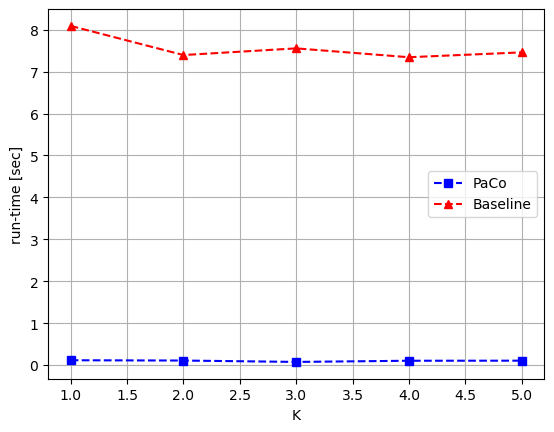

In [11]:
plt.plot(paco_k, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_k, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("K")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/socbitcoinalpha_right_panel.png')
plt.show()